In [3]:
import numpy as np
import urllib
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras import models, optimizers
from keras import layers
from keras import regularizers
%matplotlib inline

AttributeError: type object 'numpy.float16' has no attribute 'as_integer_ratio'

In [0]:
def load_spam_data():
  url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"

  raw_data = urllib.request.urlopen(url)

  dataset = np.loadtxt(raw_data, delimiter = ",")
  x_train, x_test, y_train, y_test = train_test_split(dataset[:,:-1], dataset[:,-1], test_size=0.2)
  
  y_test = np.asarray(y_test).astype('float32')
  y_train = np.asarray(y_train).astype('float32')

  return (x_train, y_train), (x_test, y_test)

In [0]:
def define_model(num_layers = 1, num_neurons = [16], input_shape = (0,), optimizer_lr = 0, dropout = 0, regularizer = "L1", reg_rate = 0):
  
  assert input_shape[0] != 0
  assert num_layers == len(num_neurons)
  
  model = models.Sequential()
  
  for i in range(num_layers):
    if reg_rate:
      if regularizer == "L1":
        model.add(layers.Dense(num_neurons[i], kernel_regularizer = regularizers.l1(reg_rate), activation = 'relu', input_shape = input_shape))
      else:
        model.add(layers.Dense(num_neurons[i], kernel_regularizer = regularizers.l2(reg_rate), activation = 'relu', input_shape = input_shape))
    else:
      model.add(layers.Dense(num_neurons[i],  activation = 'relu', input_shape = input_shape))
      
    
    if dropout:
      model.add(layers.Dropout(dropout))
    
  model.add(layers.Dense(1, activation = 'sigmoid'))
  
  if optimizer_lr:
    optimizer = optimizers.RMSprop(optimizer_lr)
  else:
    optimizer = optimizers.RMSprop()
    
  model.compile(optimizer = optimizer,
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
  
  return model

In [0]:
def smooth_curves(points, factor = 0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

In [0]:
def print_graphs(history, epochs, batch_size, smooth = 0):
  history_dict = history.history
  if smooth:
    accuracy = smooth_curves(history_dict['accuracy'], smooth)
    val_accuracy = smooth_curves(history_dict['val_accuracy'], smooth)
    loss = smooth_curves(history_dict['loss'], smooth)
    val_loss = smooth_curves(history_dict['val_loss'], smooth)
  else:
    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    
  fig = plt.figure(figsize=(15,7))

  plt.subplot(1,2,1)
  plt.plot(range(epochs), accuracy, 'r', label = 'Train Accuracy')
  plt.plot(range(epochs), val_accuracy, 'b', label = 'Validation Accuracy')
  plt.legend()
  
  plt.subplot(1,2,2)
  plt.plot(range(epochs), loss, 'r', label = 'Train Loss')
  plt.plot(range(epochs), val_loss, 'b', label = 'Validation Loss')

  plt.legend()
  plt.show()

In [0]:
(x_train, y_train), (x_test, y_test) = load_spam_data()

In [0]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [0]:
## Normalizing Features
mean = x_train.mean(axis = 0)
x_train_n = x_train - mean
std = x_train_n.std(axis = 0)
x_train_n /= std

x_val_n = x_val - mean
x_val_n = x_val_n /std

x_test = x_test - mean
x_test = x_test /std

Instructions for updating:
Use tf.cast instead.


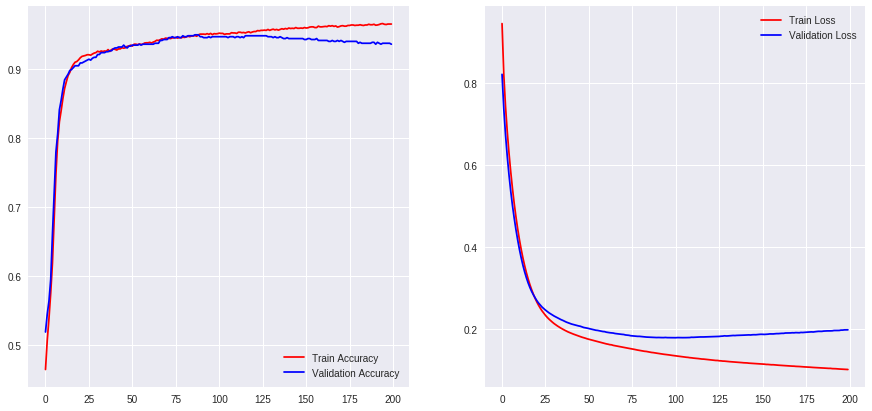

In [11]:
# 1 Layer model

epochs = 200
batch_size = 512

model = define_model(num_layers = 1, num_neurons = [16], input_shape = (x_train.shape[1],))
normalized_history = model.fit(x_train_n, y_train,
                   epochs = epochs,
                   batch_size = batch_size,
                   validation_data = (x_val_n, y_val),
                   verbose = 0)
print_graphs(history=normalized_history, epochs = epochs, batch_size = batch_size)

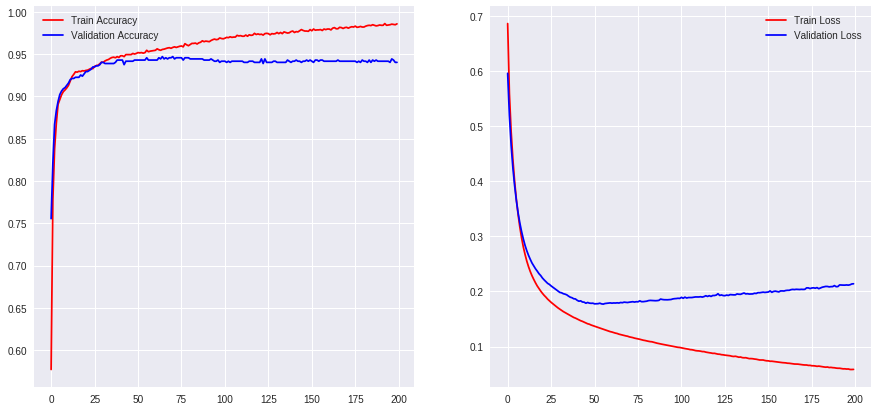

In [13]:
#Bigger Layers

model = define_model(num_layers = 1, num_neurons = [64], input_shape = (x_train.shape[1],))
normalized_history = model.fit(x_train_n, y_train,
                   epochs = epochs,
                   batch_size = batch_size,
                   validation_data = (x_val_n, y_val),
                   verbose = 0)

print_graphs(history=normalized_history, epochs = epochs, batch_size = batch_size)

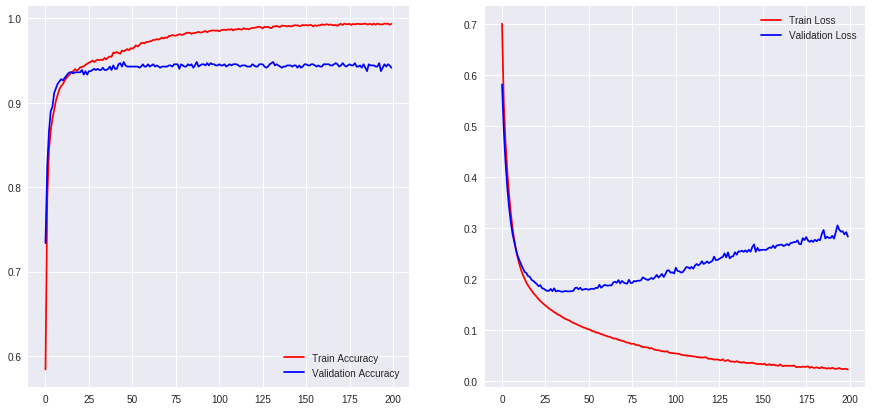

In [15]:
#More Layers

model = define_model(num_layers = 2, num_neurons = [64,16], input_shape = (x_train.shape[1],))
normalized_history = model.fit(x_train_n, y_train,
                   epochs = epochs,
                   batch_size = batch_size,
                   validation_data = (x_val_n, y_val),
                   verbose = 0)

print_graphs(history=normalized_history, epochs = epochs, batch_size = batch_size)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


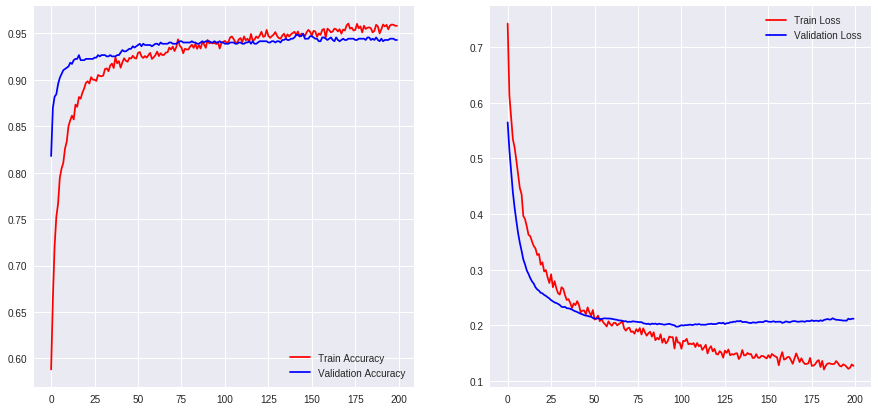

In [17]:
#Adding dropout
epochs = 200
batch_size = 512

model = define_model(num_layers = 2, num_neurons = [64,16], input_shape = (x_train.shape[1],), dropout = 0.5)
normalized_history = model.fit(x_train_n, y_train,
                   epochs = epochs,
                   batch_size = batch_size,
                   validation_data = (x_val_n, y_val),
                   verbose = 0)

print_graphs(history=normalized_history, epochs = epochs, batch_size = batch_size)


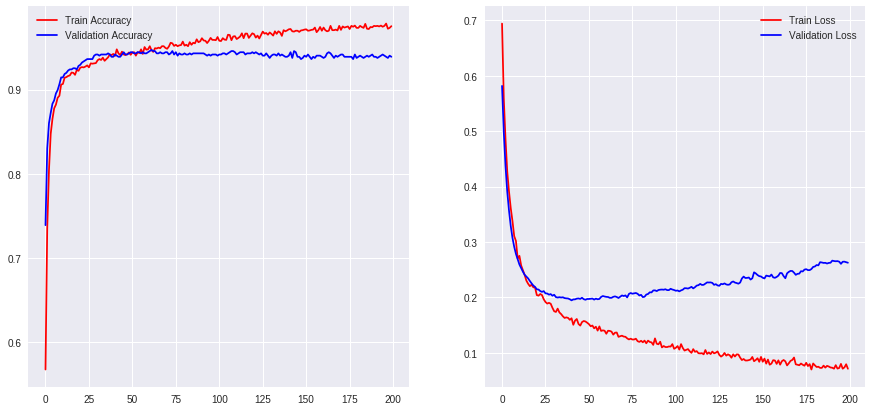

In [18]:
#Smaller dropout
epochs = 200
batch_size = 512

model = define_model(num_layers = 2, num_neurons = [64,16], input_shape = (x_train.shape[1],), dropout = 0.2)
normalized_history = model.fit(x_train_n, y_train,
                   epochs = epochs,
                   batch_size = batch_size,
                   validation_data = (x_val_n, y_val),
                   verbose = 0)

print_graphs(history=normalized_history, epochs = epochs, batch_size = batch_size)

In [ ]:
#Dropout of 0.5 seems more stable.

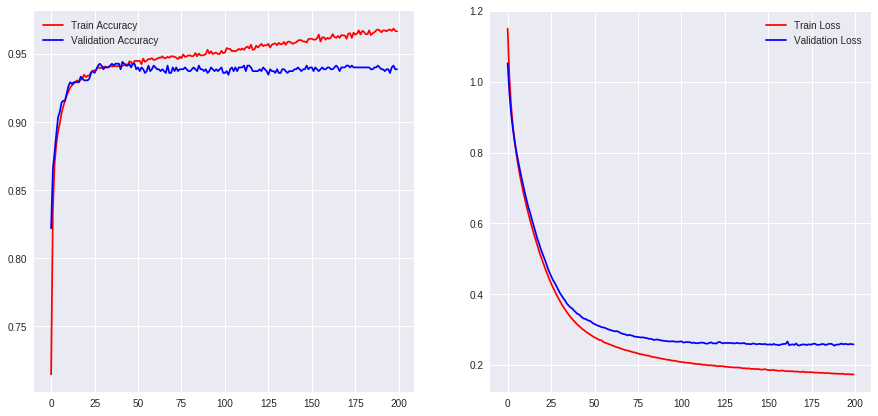

In [21]:
## L1 regularization
#L1 regularization without dropout
epochs = 200
batch_size = 512

model = define_model(num_layers = 2, num_neurons = [64, 16], input_shape = (x_train.shape[1],), regularizer="L1", reg_rate = 0.001)
l1_history = model.fit(x_train_n, y_train,
                   epochs = epochs,
                   batch_size = batch_size,
                   validation_data = (x_val_n, y_val),
                   verbose = 0)

print_graphs(history=l1_history, epochs = epochs, batch_size = batch_size)

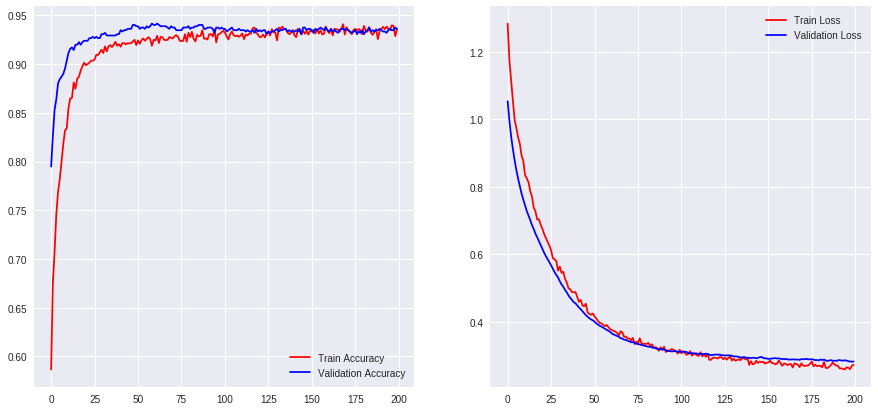

In [22]:
#L1 regularization with dropout
epochs = 200
batch_size = 512

model = define_model(num_layers = 2, num_neurons = [64, 16], input_shape = (x_train.shape[1],), regularizer="L1", reg_rate = 0.001, dropout = 0.5)
l1_history = model.fit(x_train_n, y_train,
                   epochs = epochs,
                   batch_size = batch_size,
                   validation_data = (x_val_n, y_val),
                   verbose = 0)

print_graphs(history=l1_history, epochs = epochs, batch_size = batch_size)

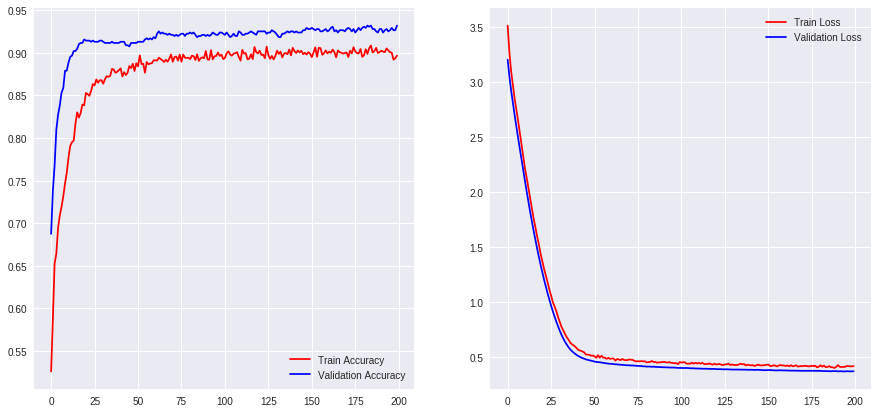

In [23]:
#Increasing Regularization Rate

epochs = 200
batch_size = 512

model = define_model(num_layers = 2, num_neurons = [64, 16], input_shape = (x_train.shape[1],), regularizer="L1", reg_rate = 0.005, dropout = 0.5)
l1_history = model.fit(x_train_n, y_train,
                   epochs = epochs,
                   batch_size = batch_size,
                   validation_data = (x_val_n, y_val),
                   verbose = 0)

print_graphs(history=l1_history, epochs = epochs, batch_size = batch_size)

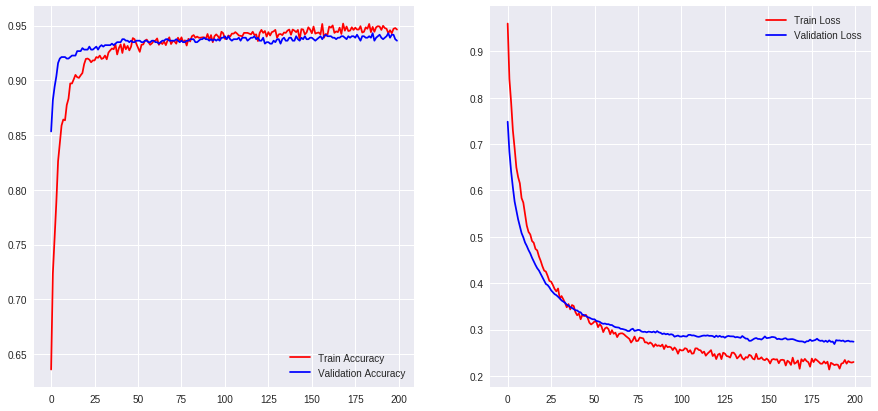

In [24]:
#Smaller regularization rate

epochs = 200
batch_size = 256

model = define_model(num_layers = 2, num_neurons = [64, 16], input_shape = (x_train.shape[1],), regularizer="L1", reg_rate = 0.0005, dropout = 0.5)
l1_history = model.fit(x_train_n, y_train,
                   epochs = epochs,
                   batch_size = batch_size,
                   validation_data = (x_val_n, y_val),
                   verbose = 0)

print_graphs(history=l1_history, epochs = epochs, batch_size = batch_size)

In [0]:
#Regularization Rate of 0.001 seems to have the best performance based on Validation and Training Losses.

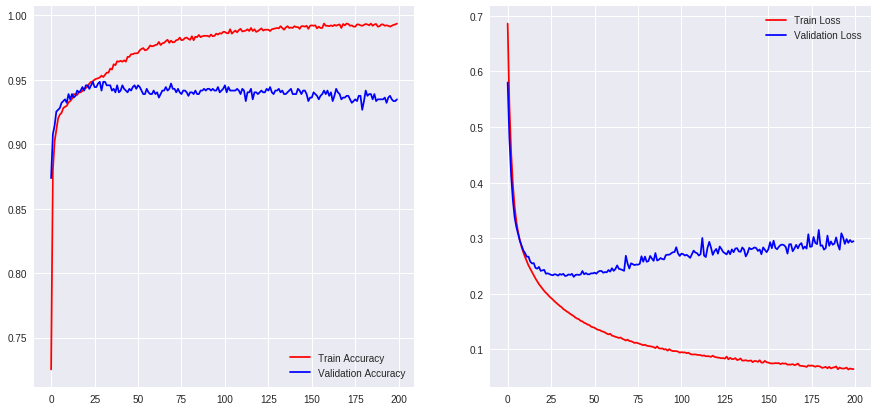

In [25]:
## L2 Regularization
#L2 WITHOUT DROPOUT
epochs = 200
batch_size = 256

model = define_model(num_layers = 2, num_neurons = [64, 16], input_shape = (x_train.shape[1],), regularizer="L2", reg_rate = 0.001)
l2_history = model.fit(x_train_n, y_train,
                   epochs = epochs,
                   batch_size = batch_size,
                   validation_data = (x_val_n, y_val),
                   verbose = 0)

print_graphs(history=l2_history, epochs = epochs, batch_size = batch_size)

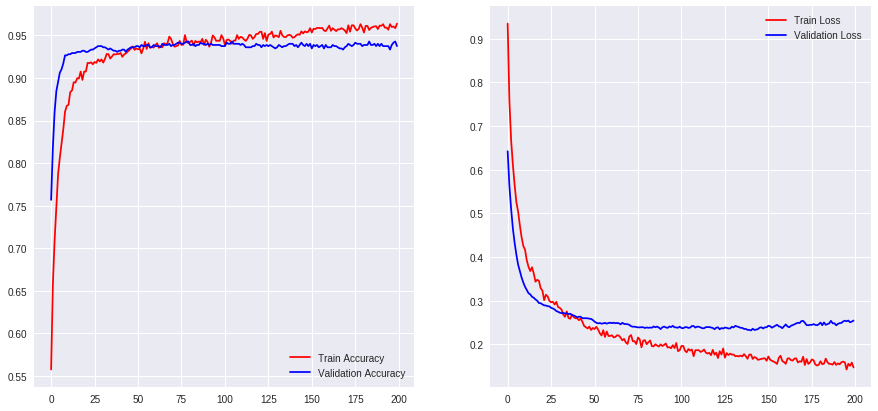

In [26]:
#L2 WITH DROPOUT
epochs = 200
batch_size = 256

model = define_model(num_layers = 2, num_neurons = [64, 16], input_shape = (x_train.shape[1],), regularizer="L2", reg_rate = 0.001, dropout = 0.5)
l2_history = model.fit(x_train_n, y_train,
                   epochs = epochs,
                   batch_size = batch_size,
                   validation_data = (x_val_n, y_val),
                   verbose = 0)

print_graphs(history=l2_history, epochs = epochs, batch_size = batch_size)

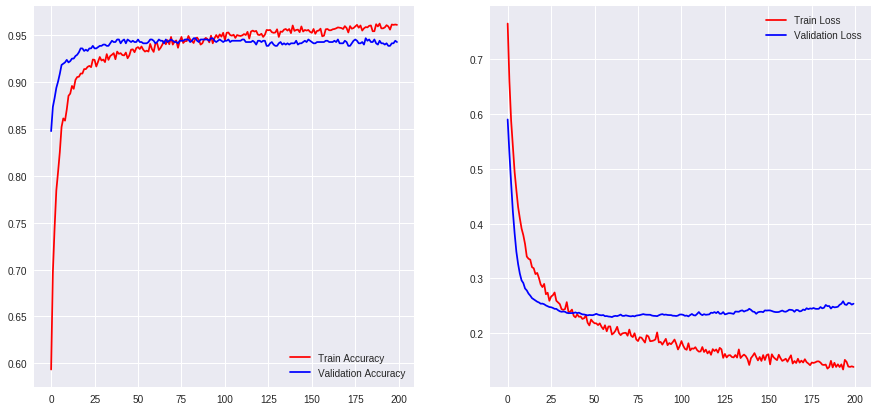

In [27]:
#Decreasing regularization rate

epochs = 200
batch_size = 256

model = define_model(num_layers = 2, num_neurons = [64, 16], input_shape = (x_train.shape[1],), regularizer="L2", reg_rate = 0.0005, dropout = 0.5)
l2_history = model.fit(x_train_n, y_train,
                   epochs = epochs,
                   batch_size = batch_size,
                   validation_data = (x_val_n, y_val),
                   verbose = 0)

print_graphs(history=l2_history, epochs = epochs, batch_size = batch_size)

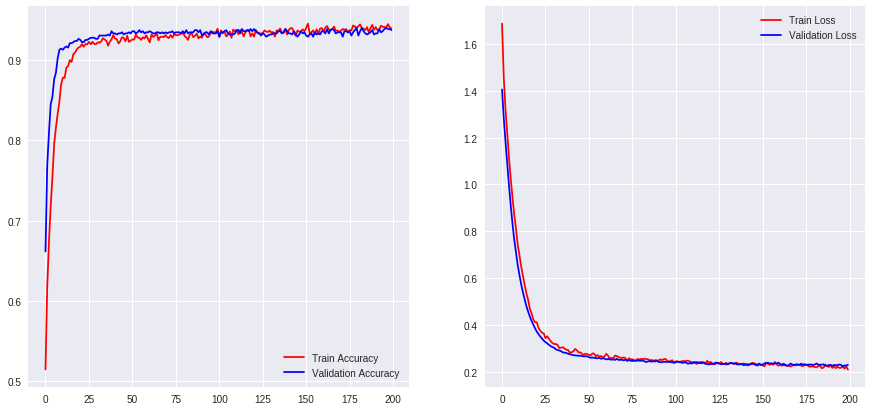

In [28]:
#Increasing regularization rate

epochs = 200
batch_size = 256

model = define_model(num_layers = 2, num_neurons = [64, 16], input_shape = (x_train.shape[1],), regularizer="L2", reg_rate = 0.01, dropout = 0.5)
l2_history = model.fit(x_train_n, y_train,
                   epochs = epochs,
                   batch_size = batch_size,
                   validation_data = (x_val_n, y_val),
                   verbose = 0)

print_graphs(history=l2_history, epochs = epochs, batch_size = batch_size)

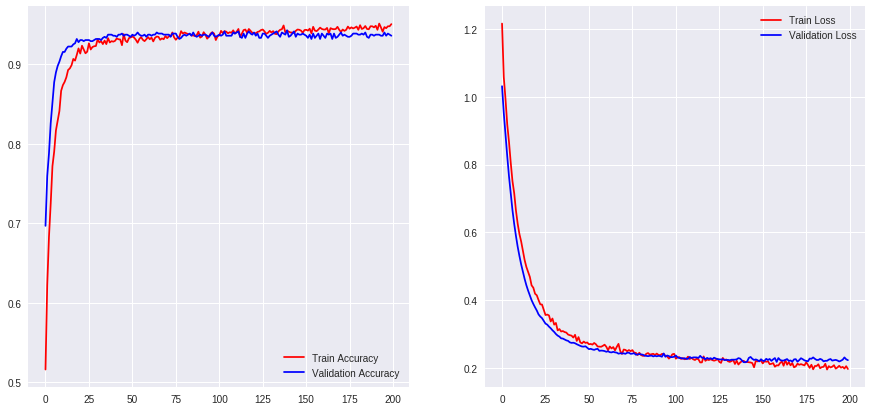

In [29]:
#Regularization rate = 0.005

epochs = 200
batch_size = 256

model = define_model(num_layers = 2, num_neurons = [64, 16], input_shape = (x_train.shape[1],), regularizer="L2", reg_rate = 0.005, dropout = 0.5)
l2_history = model.fit(x_train_n, y_train,
                   epochs = epochs,
                   batch_size = batch_size,
                   validation_data = (x_val_n, y_val),
                   verbose = 0)

print_graphs(history=l2_history, epochs = epochs, batch_size = batch_size)

In [ ]:
##L2 Regularization with a Regularization Rate of 0.005 and a Dropout of 0.5 has the best performance so far.

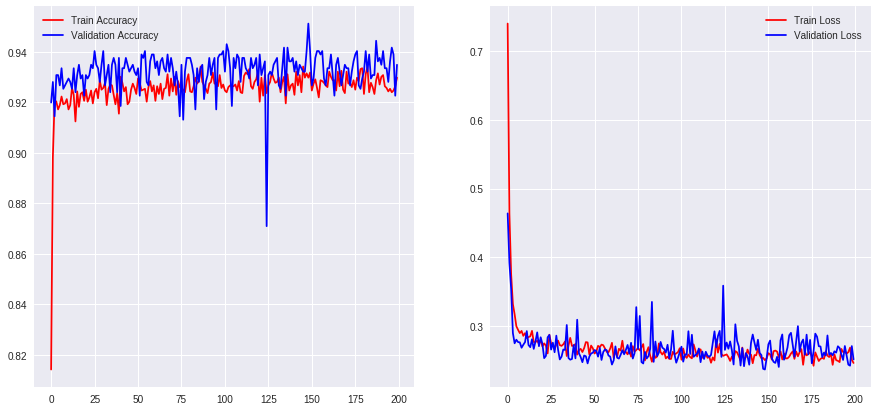

In [30]:
#Tuning optimizer
#LR = 0.01

epochs = 200
batch_size = 256

model = define_model(num_layers = 2, num_neurons = [64, 16], input_shape = (x_train.shape[1],), regularizer="L2", reg_rate = 0.005, dropout = 0.5, optimizer_lr= 0.01)


history = model.fit(x_train_n, y_train,
                   epochs = epochs,
                   batch_size = batch_size,
                   validation_data = (x_val_n, y_val),
                   verbose = 0)

print_graphs(history=history, epochs = epochs, batch_size = batch_size)

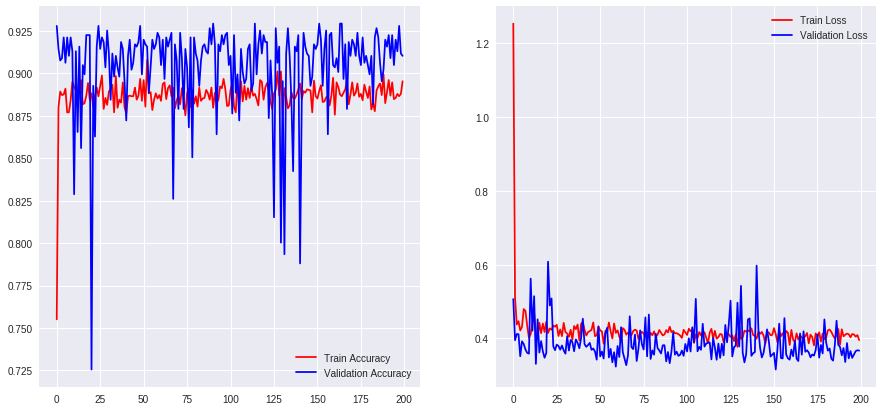

In [31]:
#LR = 0.05

epochs = 200
batch_size = 256

model = define_model(num_layers = 2, num_neurons = [64, 16], input_shape = (x_train.shape[1],), regularizer="L2", reg_rate = 0.005, dropout = 0.5, optimizer_lr= 0.05)


history = model.fit(x_train_n, y_train,
                   epochs = epochs,
                   batch_size = batch_size,
                   validation_data = (x_val_n, y_val),
                   verbose = 0)

print_graphs(history=history, epochs = epochs, batch_size = batch_size)

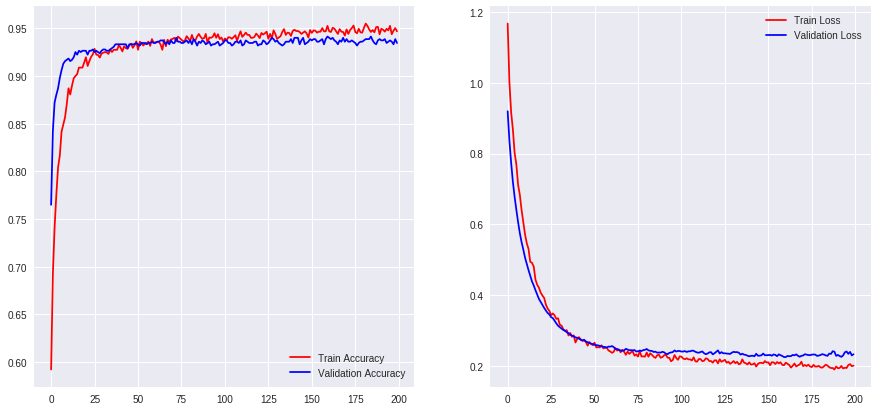

In [32]:
#LR = 0.001

epochs = 200
batch_size = 256

model = define_model(num_layers = 2, num_neurons = [64, 16], input_shape = (x_train.shape[1],), regularizer="L2", reg_rate = 0.005, dropout = 0.5, optimizer_lr= 0.001)


history = model.fit(x_train_n, y_train,
                   epochs = epochs,
                   batch_size = batch_size,
                   validation_data = (x_val_n, y_val),
                   verbose = 0)

print_graphs(history=history, epochs = epochs, batch_size = batch_size)

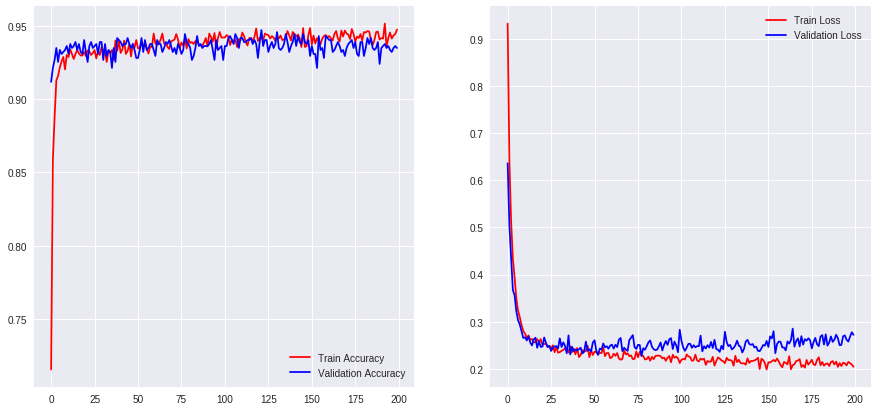

In [33]:
#LR = 0.005

epochs = 200
batch_size = 256

model = define_model(num_layers = 2, num_neurons = [64, 16], input_shape = (x_train.shape[1],), regularizer="L2", reg_rate = 0.005, dropout = 0.5, optimizer_lr= 0.005)


history = model.fit(x_train_n, y_train,
                   epochs = epochs,
                   batch_size = batch_size,
                   validation_data = (x_val_n, y_val),
                   verbose = 0)

print_graphs(history=history, epochs = epochs, batch_size = batch_size)

In [0]:
##Learning Rate of 0.001 seems most appropriate.

In [ ]:
#Model Details 
#Number of Layers: 2
#Number of Neurons: [64, 16]
#Learning Rate: 0.001
#Dropout: 0.5
#Regularization: L2
#Regularization Rate: 0.005

In [0]:
## Training Final Model
x_train_full = np.append(x_train_n, x_val_n, axis = 0)
y_train_full = np.append(y_train, y_val, axis = 0)


In [41]:
epochs = 200
batch_size = 256

final_model = define_model(num_layers = 2, num_neurons = [64, 16], input_shape = (x_train.shape[1],), regularizer="L2", reg_rate = 0.005, dropout = 0.5, optimizer_lr= 0.001)
history = final_model.fit(x_train_full, y_train_full,
                   epochs = epochs,
                   batch_size = batch_size,
                   verbose = 0)

results = final_model.evaluate(x_test, y_test)

results

921/921 [==============================] - 1s 568us/step


[0.20659577597365447, 0.948968511903972]

In [0]:
final_model.save('AS1_Spambase_model.h5')